# Imagia challenge - Blood cell dataset
---

In this challenge you will play with a very small hdf5 dataset ([BCCD](https://github.com/Shenggan/BCCD_Dataset)) of four different types of blood cells: Eosinophil, Lymphocyte, Monocyte and Neutrophil. Hdf5, or h5 for short, file format is commonly used for its lighweight and hierachical properties, which is convenient with medical datasets as the images are generaly heavy and are associated with numerous informations (type of cancer, bounding box, size of a lesion, age of the patient...).


## Goals
---
### Blood cell types
The goal of this challenge is to classify cell types. Given that we have four different cell types, multiple classification are possible: Eosinophil vs Lymphocyte vs Monocyte vs Neutrophil; or Mononuclear (Lymphocyte + Monocyte) vs Polynuclear (Neutrophil + Eosinophil).

You don't need any cell biology knowledge for this challenge, the four different cells are depicted in the picture bellow. Mononuclear implies that the cell type only has one nucleus, whereas a polynuclear has multiple. For more informations refer to the following link: [wiki blood cells](https://en.wikipedia.org/wiki/Blood_cell)

![](https://i.imgur.com/NUKi2F1.png)

### Process

With this dataset you will face different challenges that are prevalent in the medical field:
- Small number of samples (347 images total)
- Unbalanced dataset ( 88, 33, 20, and 206 images for the four classes)
- Unfamiliar data format (hdf5)

We provide a brief explanation of how hdf5 format works in the next cells of the notebook.

### Bonus
The dataset also contain bounding boxes separating the white blood cells (Eosinophil, Lymphocyte, Monocyte and Neutrophil) from the Red blood cells. There is no mandatory task given on this part, but any work on the topic will be greatly appreciated. (You will not be penalized for not working on this part, we fully understand that the challenge can already take some time and you might have other interviews alongside).

## HDF5
---
>HDF5 lets you store huge amounts of numerical data, and easily manipulate that data from NumPy. For example, you can slice into multi-terabyte datasets stored on disk, as if they were real NumPy arrays. Thousands of datasets can be stored in a single file, categorized and tagged however you want.

To read an hdf5 file you can use [h5py](http://docs.h5py.org/en/stable/) library, you an also use [hdf5view](https://www.hdfgroup.org/downloads/hdfview/) as a desktop viewer.


Here is a way to navigate through a h5 with h5py and look at the current architecture:

In [21]:
import h5py
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
def printname(name):
    print(name)
with h5py.File('../BC.hdf5', 'r') as hf:
    hf.visit(printname)

test
test/EOSINOPHIL_BloodImage_00228.jpg
test/EOSINOPHIL_BloodImage_00236.jpg
test/EOSINOPHIL_BloodImage_00240.jpg
test/EOSINOPHIL_BloodImage_00251.jpg
test/EOSINOPHIL_BloodImage_00253.jpg
test/EOSINOPHIL_BloodImage_00259.jpg
test/EOSINOPHIL_BloodImage_00261.jpg
test/EOSINOPHIL_BloodImage_00265.jpg
test/EOSINOPHIL_BloodImage_00269.jpg
test/EOSINOPHIL_BloodImage_00271.jpg
test/EOSINOPHIL_BloodImage_00274.jpg
test/EOSINOPHIL_BloodImage_00277.jpg
test/EOSINOPHIL_BloodImage_00284.jpg
test/EOSINOPHIL_BloodImage_00289.jpg
test/LYMPHOCYTE_BloodImage_00241.jpg
test/LYMPHOCYTE_BloodImage_00254.jpg
test/LYMPHOCYTE_BloodImage_00258.jpg
test/LYMPHOCYTE_BloodImage_00264.jpg
test/LYMPHOCYTE_BloodImage_00270.jpg
test/MONOCYTE_BloodImage_00309.jpg
test/MONOCYTE_BloodImage_00312.jpg
test/MONOCYTE_BloodImage_00318.jpg
test/NEUTROPHIL_BloodImage_00326.jpg
test/NEUTROPHIL_BloodImage_00327.jpg
test/NEUTROPHIL_BloodImage_00329.jpg
test/NEUTROPHIL_BloodImage_00330.jpg
test/NEUTROPHIL_BloodImage_00331.jpg
te

As you can see the architecture is the following:
```bash
BC.hdf5
├── test
|  ├── EOSINOPHIL_BloodImage_00228.jpg
|  └── ...
├── train
|   ├── EOSINOPHIL_BloodImage_00009.jpg
|   └── ...
└── val
    ├── EOSINOPHIL_BloodImage_00290.jpg
    └── ...

```
The name of the files contains the image's class (EOSINOPHIL, NEUTROPHIL, MONOCYTE and LYMPHOCYTE). The splitting ratio is 0.7, 0.15 and 0.15 for the train, test and val accordingly.
The .jpg images are in fact 'Datasets' objects but can easily converted in numpy array (see following cell) and plotted.

NOTE: A h5py needs to be closed at the end of an operation, otherwise you can not open it in another program or with hdf5View. By using the `with h5py.File('../BC.hdf5', 'r') as hf:` you open and close the file in the same loop. If you use hdf5View do not forget to close the file manualy (right click on it then close) in order to open it with h5py afterward.

<class 'numpy.ndarray'>


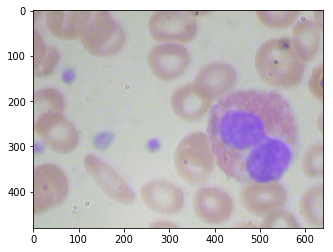

In [22]:
with h5py.File('../BC.hdf5', 'r') as hf:
    image = hf["val/EOSINOPHIL_BloodImage_00410.jpg"][()]
    print(type(image))
    plt.imshow(image)
    plt.show()

Here is a way to display the bounding boxes from the xml files and plot them.

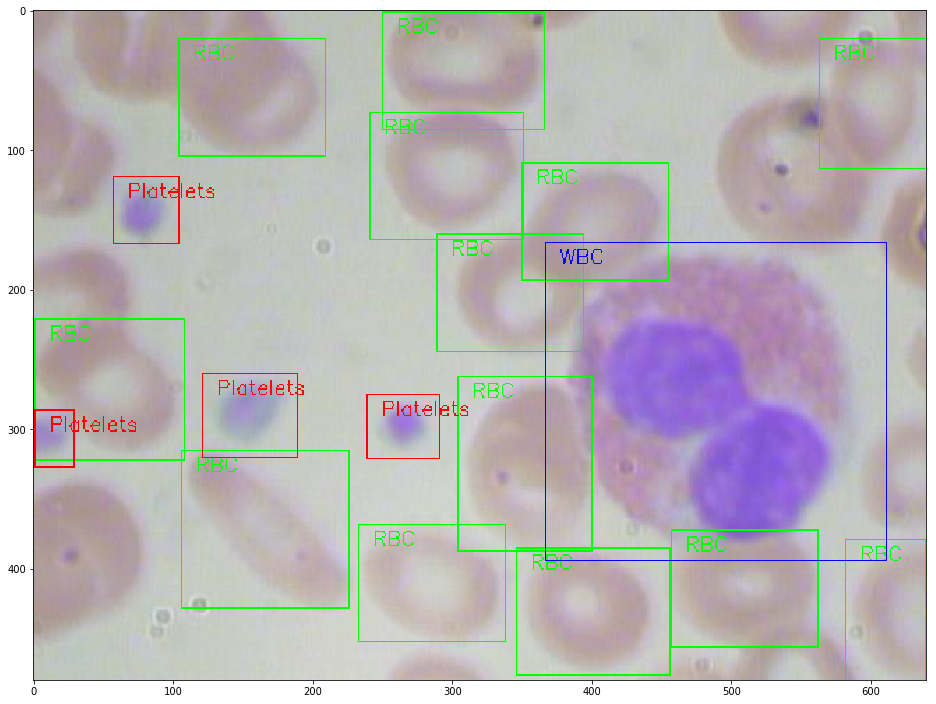

In [10]:
import xml.etree.ElementTree as ET
import cv2
#image = cv2.imread("../input/dataset-master/dataset-master/JPEGImages/BloodImage_00022.jpg")
tree = ET.parse("./BC/dataset-master/Annotations/BloodImage_00410.xml")
for elem in tree.iter():
    if 'object' in elem.tag or 'part' in elem.tag:
        for attr in list(elem):
            if 'name' in attr.tag:
                name = attr.text
            if 'bndbox' in attr.tag:
                for dim in list(attr):
                    if 'xmin' in dim.tag:
                        xmin = int(round(float(dim.text)))
                    if 'ymin' in dim.tag:
                        ymin = int(round(float(dim.text)))
                    if 'xmax' in dim.tag:
                        xmax = int(round(float(dim.text)))
                    if 'ymax' in dim.tag:
                        ymax = int(round(float(dim.text)))
                if name[0] == "R":
                    cv2.rectangle(image, (xmin, ymin),
                                (xmax, ymax), (0, 255, 0), 1)
                    cv2.putText(image, name, (xmin + 10, ymin + 15),
                            cv2.FONT_HERSHEY_SIMPLEX, 1e-3 * image.shape[0], (0, 255, 0), 1)
                if name[0] == "W":
                    cv2.rectangle(image, (xmin, ymin),
                                (xmax, ymax), (0, 0, 255), 1)
                    cv2.putText(image, name, (xmin + 10, ymin + 15),
                            cv2.FONT_HERSHEY_SIMPLEX, 1e-3 * image.shape[0], (0, 0, 255), 1)
                if name[0] == "P":
                    cv2.rectangle(image, (xmin, ymin),
                                (xmax, ymax), (255, 0, 0), 1)
                    cv2.putText(image, name, (xmin + 10, ymin + 15),
                            cv2.FONT_HERSHEY_SIMPLEX, 1e-3 * image.shape[0], (255, 0, 0), 1)
plt.figure(figsize=(16,16))
plt.imshow(image)
plt.show()

### Final notes

For this classification challenge you are allowed to use any framework between keras, tensorflow and pytorch. The model(s) you will use is up to you, it can be a very simple CNN, a pretrained ResNet etc. You will not be evaluated on the accuracy of your model but mostly on the way you solved the different challenges, your code cleanliness and your github/bitbucket usage. Also don't forget to include any script you used if you chose to convert the hdf5 dataset in another format.
The code has to be runnable from Imagia. We are in a setup where anything can be installed from a requirement.txt file.

Feel free to contact us if you have any questions.